import all required libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

Read the dataset

In [3]:
from google.colab import files
#uploaded = files.upload()
data=pd.read_csv("/content/ahmedabad.csv")
data.head()

,date_time,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,moonrise,moonset,sunrise,sunset,DewPointC,FeelsLikeC,HeatIndexC,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,location
0,1/1/2015,27,15,0,10.8,6,72,3:07 PM,3:36 AM,7:21 AM,6:05 PM,12,20,20,20,33,11,61,0.4,1011,27,10,62,20,ahmedabad
1,1/2/2015,25,14,0,10.9,6,80,3:55 PM,4:31 AM,7:21 AM,6:06 PM,12,19,20,19,26,6,65,0.0,1014,25,10,70,16,ahmedabad
2,1/3/2015,26,15,0,10.9,6,87,4:45 PM,5:26 AM,7:21 AM,6:07 PM,13,21,21,21,14,1,60,0.0,1015,26,10,90,9,ahmedabad
3,1/4/2015,27,16,0,10.9,6,94,5:37 PM,6:17 AM,7:22 AM,6:07 PM,9,21,21,22,22,0,46,0.0,1017,27,10,68,13,ahmedabad
4,1/5/2015,27,14,0,10.9,6,100,6:28 PM,7:07 AM,7:22 AM,6:08 PM,5,20,20,20,24,0,40,0.0,1017,27,10,65,14,ahmedabad


**Set the position of target feature**

In [4]:
t1 = data['tempC']
data.drop(labels=['tempC'], axis=1, inplace = True)
data.insert(1, 'tempC', t1)
t2 = data['humidity']
data.drop(labels=['humidity'], axis=1, inplace = True)
data.insert(2, 'humidity', t2)
data

,date_time,tempC,humidity,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,moonrise,moonset,sunrise,sunset,DewPointC,FeelsLikeC,HeatIndexC,WindChillC,WindGustKmph,cloudcover,precipMM,pressure,visibility,winddirDegree,windspeedKmph,location
0,1/1/2015,27,61,27,15,0,10.8,6,72,3:07 PM,3:36 AM,7:21 AM,6:05 PM,12,20,20,20,33,11,0.4,1011,10,62,20,ahmedabad
1,1/2/2015,25,65,25,14,0,10.9,6,80,3:55 PM,4:31 AM,7:21 AM,6:06 PM,12,19,20,19,26,6,0.0,1014,10,70,16,ahmedabad
2,1/3/2015,26,60,26,15,0,10.9,6,87,4:45 PM,5:26 AM,7:21 AM,6:07 PM,13,21,21,21,14,1,0.0,1015,10,90,9,ahmedabad
3,1/4/2015,27,46,27,16,0,10.9,6,94,5:37 PM,6:17 AM,7:22 AM,6:07 PM,9,21,21,22,22,0,0.0,1017,10,68,13,ahmedabad
4,1/5/2015,27,40,27,14,0,10.9,6,100,6:28 PM,7:07 AM,7:22 AM,6:08 PM,5,20,20,20,24,0,0.0,1017,10,65,14,ahmedabad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2187,12/27/2020,29,33,29,21,0,10.8,7,85,3:54 PM,4:40 AM,7:19 AM,6:03 PM,6,25,25,24,17,0,0.0,1013,10,219,11,ahmedabad
2188,12/28/2020,25,15,25,14,0,10.8,6,92,4:37 PM,5:34 AM,7:19 AM,6:03 PM,-9,19,20,19,20,0,0.0,1015,10,100,13,ahmedabad
2189,12/29/2020,25,17,25,12,0,10.8,5,100,5:26 PM,6:29 AM,7:20 AM,6:04 PM,-7,17,18,17,26,0,0.0,1015,10,49,16,ahmedabad
2190,12/30/2020,25,24,25,13,0,10.8,6,100,6:18 PM,7:24 AM,7:20 AM,6:04 PM,-3,18,19,18,27,0,0.0,1015,10,44,17,ahmedabad


**Drop the columns which is redundunt to predict the temperature and which has all null values**

In [5]:
data.drop(["maxtempC","mintempC","moonrise", "moonset","sunrise","sunset","location","totalSnow_cm","FeelsLikeC"], axis = 1, inplace = True) 
data.drop(["date_time"],axis = 1, inplace = True)
data

,tempC,humidity,sunHour,uvIndex,moon_illumination,DewPointC,HeatIndexC,WindChillC,WindGustKmph,cloudcover,precipMM,pressure,visibility,winddirDegree,windspeedKmph
0,27,61,10.8,6,72,12,20,20,33,11,0.4,1011,10,62,20
1,25,65,10.9,6,80,12,20,19,26,6,0.0,1014,10,70,16
2,26,60,10.9,6,87,13,21,21,14,1,0.0,1015,10,90,9
3,27,46,10.9,6,94,9,21,22,22,0,0.0,1017,10,68,13
4,27,40,10.9,6,100,5,20,20,24,0,0.0,1017,10,65,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2187,29,33,10.8,7,85,6,25,24,17,0,0.0,1013,10,219,11
2188,25,15,10.8,6,92,-9,20,19,20,0,0.0,1015,10,100,13
2189,25,17,10.8,5,100,-7,18,17,26,0,0.0,1015,10,49,16
2190,25,24,10.8,6,100,-3,19,18,27,0,0.0,1015,10,44,17


# **Feature Selection Process**

In [6]:
X=data.iloc[:,2:15] ## independent features
y=data.iloc[:,0:2] ## dependent features
m = len(y)

print(X);
print(y);
print(m);


      sunHour  uvIndex  ...  winddirDegree  windspeedKmph
0        10.8        6  ...             62             20
1        10.9        6  ...             70             16
2        10.9        6  ...             90              9
3        10.9        6  ...             68             13
4        10.9        6  ...             65             14
...       ...      ...  ...            ...            ...
2187     10.8        7  ...            219             11
2188     10.8        6  ...            100             13
2189     10.8        5  ...             49             16
2190     10.8        6  ...             44             17
2191     10.8        6  ...             51             18

[2192 rows x 13 columns]
      tempC  humidity
0        27        61
1        25        65
2        26        60
3        27        46
4        27        40
...     ...       ...
2187     29        33
2188     25        15
2189     25        17
2190     25        24
2191     28        33

[2192 rows x 

**Split dataset into training and testing dataset to fit the model**

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

**Apply Multiple Linear regression**

In [8]:
# Fitting multiple lineaar regression to the training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
model=regressor.fit(X_train, y_train)
# Predicting the test set results
y_pred = model.predict(X_test)
#print(y_test,y_pred)

r2 = model.score(X_test, y_test)
print(r2)

0.9705005229149828


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


In [ ]:
print(regressor.coef_)
print(regressor.intercept_)


[[ 9.42233993e-02  5.44196447e-01 -1.30781652e-03 -1.17274042e-01
   2.56686916e-01  6.72551926e-01  1.68357698e-01 -1.95615861e-02
  -2.49830949e-02  1.31795945e-02 -1.42364662e-02  1.64591929e-03
  -1.47770397e-01]
 [-2.69846051e-01 -2.78637645e-01  7.62215204e-03  1.93879501e+00
   3.31227704e-01 -1.98239594e+00  2.43884904e-01  1.03625491e-01
   8.78712342e-02 -1.23675682e-01 -3.49510799e-02  1.43539931e-02
  -3.79092749e-01]]
[-11.13099223 189.84723076]


In [10]:
#combine two dataframe of actual and predicted values
df = pd.DataFrame(y_pred, columns = ['Predicted_temperature','predicted_humidity']) 
y1=y_test.to_numpy()
dff = pd.DataFrame(y1, columns = ['Actual_temp','Actual_humidity']) 
dff
dff1 = df.join(dff)

print(dff1)
#df.plot()

     Predicted_temperature  predicted_humidity  Actual_temp  Actual_humidity
0                33.857059           66.247866           33               75
1                29.195289           26.641592           29               29
2                35.108501           36.428917           34               33
3                31.880233           73.348210           33               74
4                28.293955           39.428463           28               40
..                     ...                 ...          ...              ...
434              30.128623           76.102258           31               78
435              31.887698           24.678172           31               23
436              29.493716           26.868181           32               26
437              27.931133           27.057433           28               26
438              42.056943           44.677633           41               42

[439 rows x 4 columns]


In [11]:
dff1

,Predicted_temperature,predicted_humidity,Actual_temp,Actual_humidity
0,33.857059,66.247866,33,75
1,29.195289,26.641592,29,29
2,35.108501,36.428917,34,33
3,31.880233,73.348210,33,74
4,28.293955,39.428463,28,40
...,...,...,...,...
434,30.128623,76.102258,31,78
435,31.887698,24.678172,31,23
436,29.493716,26.868181,32,26
437,27.931133,27.057433,28,26


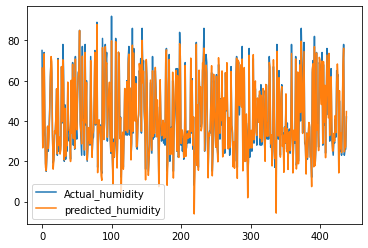

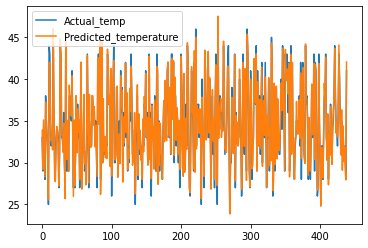

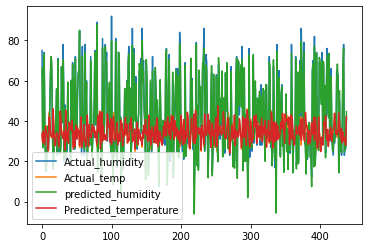

In [21]:
#visualisation of output
dff1.plot(y=['Actual_humidity','predicted_humidity'])
dff1.plot(y=['Actual_temp','Predicted_temperature'])
dff1.plot(y=['Actual_humidity','Actual_temp','predicted_humidity','Predicted_temperature'])


**Apply Polynomial Regression**

In [ ]:
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.linear_model import LinearRegression
  
poly = PolynomialFeatures(degree = 2) 
X_poly = poly.fit_transform(X_train) 
  
poly.fit(X_poly, y_train) 
lin2 = LinearRegression() 
lin2.fit(X_poly, y_train) 
a=lin2.predict(poly.fit_transform(X_test))
 

In [ ]:
score=lin2.score(poly.fit_transform(X_test),y_test)
print(score)

0.9918454987366242


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


In [ ]:
#combine two data frames for actual values and predicted values
df = pd.DataFrame(a, columns = ['Predicted_temp','predicted_pre']) 
y1=y_test.to_numpy()
dff = pd.DataFrame(y1, columns = ['temp','humi']) 
dff
dff1 = df.join(dff)


In [ ]:
dff1

,Predicted_temp,predicted_pre,temp,humi
0,33.132600,73.626667,33,75
1,29.097460,27.655064,29,29
2,35.427393,34.316241,34,33
3,32.109882,74.218637,33,74
4,28.999833,39.557858,28,40
...,...,...,...,...
434,29.561591,78.858334,31,78
435,31.029071,22.324937,31,23
436,29.990276,27.582767,32,26
437,27.744025,24.804625,28,26
